<a href="https://colab.research.google.com/github/helainytorres/python/blob/main/transformClusteringSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
###########################################################################################################

In [ ]:
pip install scanpy torch scipy numpy scikit-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 11.1 MB/s eta 0:00:00
   

In [ ]:
import scanpy as sc
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **1. Carregar dados de expressão gênica com scanpy**
# Baixando um dataset público (ex.: PBMCs 3k células do 10x Genomics)
#adata = sc.datasets.pbmc3k()

In [ ]:
arquivo_h5ad = '/content/drive/MyDrive/Doutorado/SC/arquivo.h5ad'
adata = sc.read_h5ad(arquivo_h5ad)

In [ ]:
#2700 celulas  x 32738 genes
#pegando apenas os 1000 genes mais representativos
adata.shape

(391989, 45575)

In [ ]:
adata

AnnData object with n_obs × n_vars = 391989 × 45575
    obs: 'nCount_RNA', 'nFeature_RNA', 'harm_study', 'harm_healthy.tissue', 'harm_tumor.site', 'harm_sample.type', 'harm_condition', 'harm_tumor.type', 'harm_cd45pos', 'harm_healthy.pat', 'percent.mt', 'ratio_nCount_nFeature', 'batch', 'X_scvi_batch', 'X_scvi_labels', 'X_scvi_local_l_mean', 'X_scvi_local_l_var', 'leiden_0.2', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1', 'leiden_1.2', 'leiden_1.4', 'author_first_cell_type', 'author_cell_type', 'cnv_score', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'assay_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'external_gene_name', 'gene_

In [ ]:
keys = ['citation', 'schema_reference', 'schema_version', 'title']
for key in keys:
    print(f"{key}: {adata.uns[key]}")

citation: Publication: https://doi.org/10.1038/s41467-024-49916-4 Dataset Version: https://datasets.cellxgene.cziscience.com/861b60b5-ea84-458a-8d2a-6248d0e83bc1.h5ad curated and distributed by CZ CELLxGENE Discover in Collection: https://cellxgene.cziscience.com/collections/3f7c572c-cd73-4b51-a313-207c7f20f188
schema_reference: https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/5.2.0/schema.md
schema_version: 5.2.0
title: A multi-tissue single-cell tumor microenvironment atlas


In [ ]:
adata.var[['external_gene_name','feature_name']]

,external_gene_name,feature_name
ensembl,,
ENSG00000000003,TSPAN6,TSPAN6
ENSG00000000005,TNMD,TNMD
ENSG00000000419,DPM1,DPM1
ENSG00000000457,SCYL3,SCYL3
ENSG00000000460,FIRRM,C1orf112
...,...,...
ENSG00000292348,CD99,CD99_ENSG00000292348
ENSG00000292357,CSF2RA,CSF2RA_ENSG00000292357
ENSG00000292358,GTPBP6,GTPBP6_ENSG00000292358


In [ ]:
adata.obs[['author_first_cell_type','author_cell_type','tissue']]

,author_first_cell_type,author_cell_type,tissue
P2_1_AAACCTGAGAAACCAT-0,Endothelial Cells,Endothelial,lung
P2_1_AAATGCCAGATGAGAG-0,Endothelial Cells,Endothelial,lung
P2_1_AACACGTTCGATCCCT-0,Endothelial Cells,Endothelial,lung
P2_1_AACACGTTCGCACTCT-0,Endothelial Cells,Endothelial,lung
P2_1_AACCATGCAGCTCGCA-0,Endothelial Cells,Endothelial,lung
...,...,...,...
TTTCGAACTCTCAT-1,Mononuclear Phagocytes,MonoInter_CLEC10A,blood
TTTCTACTGAGGCA-1,B Cells,B_cells,blood
TTTCTACTTCCTCG-1,B Cells,B_cells,blood
TTTGCATGAGAGGC-1,B Cells,B_cells,blood


In [ ]:
import pandas as pd
unique_combinations = pd.DataFrame(adata.obs[['author_first_cell_type','author_cell_type']]).drop_duplicates().values
print(unique_combinations)

[['Endothelial Cells' 'Endothelial']
 ['Epithelial Cells' 'lung_normal']
 ['Mononuclear Phagocytes' 'Mac_AgPres']
 ['Mononuclear Phagocytes' 'RTM_IM']
 ['Mononuclear Phagocytes' 'RTM_LA']
 ['Mononuclear Phagocytes' 'Mac_Rec']
 ['Mononuclear Phagocytes' 'cDC3_CD14']
 ['Mononuclear Phagocytes' 'cDC2_AREG']
 ['Mononuclear Phagocytes' 'cDC1_CLEC9A']
 ['Mononuclear Phagocytes' 'cDC_CXCL8']
 ['Mononuclear Phagocytes' 'cDC_LAMP3']
 ['Plasmacytoid Dendritic Cells' 'pDC']
 ['Mononuclear Phagocytes' 'cDC2_FCER1A']
 ['B Cells' 'B_cells']
 ['Mononuclear Phagocytes' 'cDC4_FCGR3A']
 ['Mononuclear Phagocytes' 'Mono_IL1B']
 ['Mononuclear Phagocytes' 'Mac_Angio']
 ['Mononuclear Phagocytes' 'MonoInter_CLEC10A']
 ['Mononuclear Phagocytes' 'Mac_Alv-like']
 ['Mononuclear Phagocytes' 'RTM_IFN']
 ['Mononuclear Phagocytes' 'Mac_IFN']
 ['Mononuclear Phagocytes' 'Mac_Hypo']
 ['Mononuclear Phagocytes' 'Mac_LA']
 ['Mononuclear Phagocytes' 'RTM-like_MT']
 ['Mononuclear Phagocytes' 'Mono_CD14_FOS-']
 ['Fibroblasts'

In [ ]:
adata.obs['tissue_type'].unique()

['tissue']
Categories (1, object): ['tissue']

In [ ]:
adata.obs['author_first_cell_type'].unique()

['Endothelial Cells', 'Epithelial Cells', 'Mononuclear Phagocytes', 'Plasmacytoid Dendritic Cells', 'B Cells', ..., 'T/NK Cells', 'Mast Cells', 'Platelets', 'Neutrophils', 'Malignant Cells']
Length: 11
Categories (11, object): ['B Cells', 'Endothelial Cells', 'Epithelial Cells', 'Fibroblasts', ...,
                          'Mononuclear Phagocytes', 'Neutrophils', 'Plasmacytoid Dendritic Cells',
                          'T/NK Cells']

In [ ]:
adata.obs['author_cell_type'].unique()

['Endothelial', 'lung_normal', 'Mac_AgPres', 'RTM_IM', 'RTM_LA', ..., 'colorectal_tumor', 'liver_normal', 'liver_tumor', 'melanoma_tumor', 'melanoma_normal']
Length: 60
Categories (60, object): ['B_cells', 'Endothelial', 'Fibroblasts', 'Mac_AgPres', ..., 'pDC',
                          'skin_normal', 'uveal melanoma_normal', 'uveal melanoma_tumor']

In [ ]:
# Normalização básica e log-transformação para estabilizar variâncias.
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [ ]:
#Filtragem de Genes:
# Selecionando genes altamente variáveis
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]

In [ ]:
!pip install transformers
from transformers import BertTokenizer, BertModel

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
# 2. Configurar GeneBERT
model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
#model_name = "GeneBERT-model-name"  # Substitua pelo modelo específico
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# prompt: como exibir a configuraçã da bert

from transformers import BertConfig

# Carrega a configuração do modelo BERT
config = BertConfig.from_pretrained(model_name)

# Exibe a configuração
config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:
# 3. Gerar Embeddings para os Genes
def generate_gene_embeddings(genes, tokenizer, model):
    embeddings = []
    for gene in genes:
        # Tokenizar o nome do gene
        inputs = tokenizer(gene, return_tensors="pt", padding=True, truncation=True)
        # Passar pelo modelo GeneBERT
        outputs = model(**inputs)
        # Usar a média dos embeddings na última camada
        embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.append(embedding)
    return np.vstack(embeddings)


In [ ]:
gene_names = adata.var_names

In [ ]:
gene_names.shape

(3000,)

In [ ]:
gene_names.shape

(3000,)

In [ ]:
tokenizer

BertTokenizer(name_or_path='microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [ ]:
# Gerar embeddings para cada gene
gene_embeddings = generate_gene_embeddings(gene_names, tokenizer, model)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
import sys
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [ ]:
gene_embeddings.shape

(3000, 768)

In [ ]:
adata.obs_names

Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1',
       'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1',
       'AAACGCTGTTTCTG-1',
       ...
       'TTTCAGTGTCACGA-1', 'TTTCAGTGTCTATC-1', 'TTTCAGTGTGCAGT-1',
       'TTTCCAGAGGTGAG-1', 'TTTCGAACACCTGA-1', 'TTTCGAACTCTCAT-1',
       'TTTCTACTGAGGCA-1', 'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1',
       'TTTGCATGCCTCAC-1'],
      dtype='object', name='index', length=2700)

In [ ]:
adata.X

<2700x3000 sparse matrix of type '<class 'numpy.float32'>'
	with 551176 stored elements in Compressed Sparse Row format>

In [ ]:
# 4. Projetar as Células no Espaço Latente
# Multiplicar os níveis de expressão pelos embeddings dos genes
cell_embeddings = np.dot(adata.X, gene_embeddings)

In [ ]:
gene_matrix.columns

Index(['gene1', 'gene2', 'gene3', 'gene4'], dtype='object')

In [ ]:
###################################################################################

In [ ]:
pip install scanpy torch scipy numpy scikit-learn

In [ ]:
import scanpy as sc
from transformers import BertTokenizer, BertModel
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:


# 1. Carregar os Dados
adata = sc.datasets.pbmc3k()
sc.pp.normalize_total(adata, target_sum=1e4)  # Normalização
sc.pp.log1p(adata)  # Transformação logarítmica
sc.pp.highly_variable_genes(adata, n_top_genes=2000)  # Selecionar genes mais variáveis
adata = adata[:, adata.var['highly_variable']]  # Filtrar apenas os genes mais variáveis

# 2. Configurar GeneBERT
model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"  # Substitua pelo nome do modelo específico
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# 3. Gerar Embeddings para os Genes
def generate_gene_embeddings(genes, tokenizer, model):
    embeddings = []
    for gene in genes:
        # Tokenizar o nome do gene
        inputs = tokenizer(gene, return_tensors="pt", padding=True, truncation=True)
        # Passar pelo modelo GeneBERT
        outputs = model(**inputs)
        # Usar a média dos embeddings na última camada
        embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.append(embedding)
    return np.vstack(embeddings)

gene_names = adata.var_names.tolist()  # Nomes dos genes
gene_embeddings = generate_gene_embeddings(gene_names, tokenizer, model)

# 4. Projetar as Células no Espaço Latente
expression_matrix = adata.X.toarray()  # Converter para matriz densa
cell_embeddings = np.dot(expression_matrix, gene_embeddings)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
# 5. Clusterizar as Células
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(cell_embeddings)
adata.obs['clusters'] = clusters  # Adicionar clusters como metadados

<ipython-input-5-20a457ffc84e>:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['clusters'] = clusters  # Adicionar clusters como metadados


In [ ]:
pip install leidenalg

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


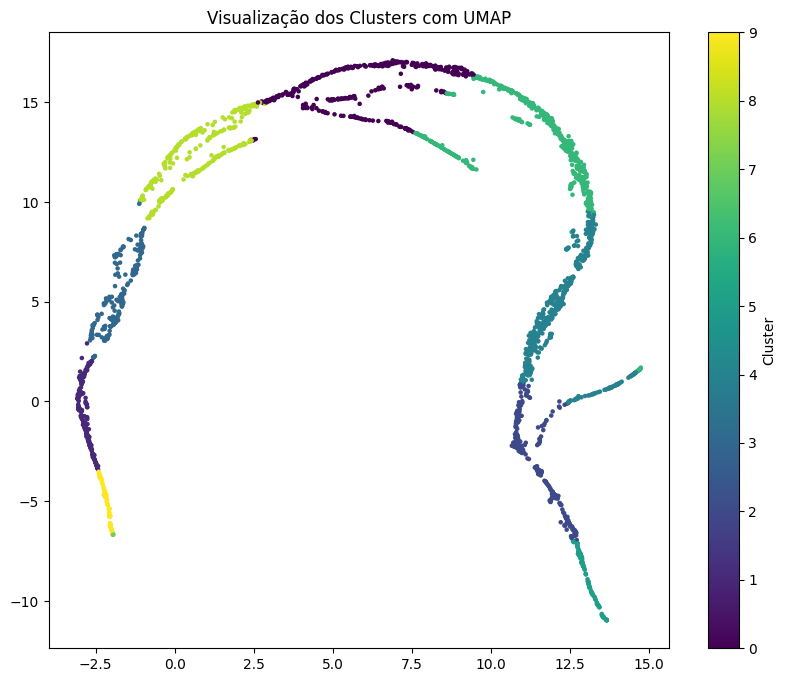

In [ ]:
# prompt: como Visualizar os Clusters com umap

import umap

# 6. Visualizar os Clusters com UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(cell_embeddings)

# Plotar os clusters
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('Visualização dos Clusters com UMAP')
plt.colorbar(label='Cluster')
plt.show()

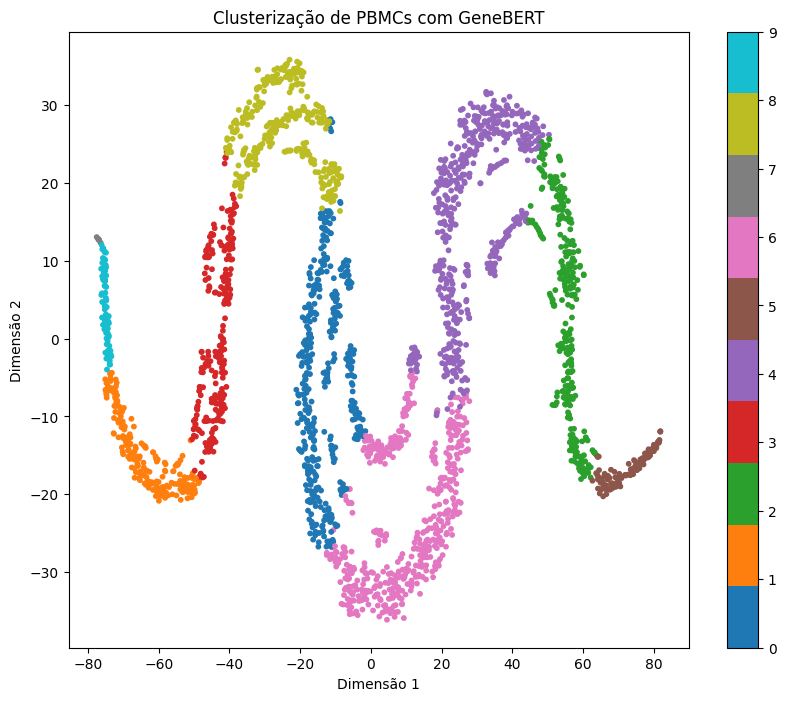

In [ ]:
# 6. Visualizar os Clusters com t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(cell_embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap="tab10", s=10)
plt.colorbar()
plt.title("Clusterização de PBMCs com GeneBERT")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()


In [ ]:
adata.obs

,clusters,leiden
index,,
AAACATACAACCAC-1,4,3
AAACATTGAGCTAC-1,8,2
AAACATTGATCAGC-1,8,0
AAACCGTGCTTCCG-1,3,1
AAACCGTGTATGCG-1,6,5
...,...,...
TTTCGAACTCTCAT-1,3,1
TTTCTACTGAGGCA-1,0,2
TTTCTACTTCCTCG-1,4,2


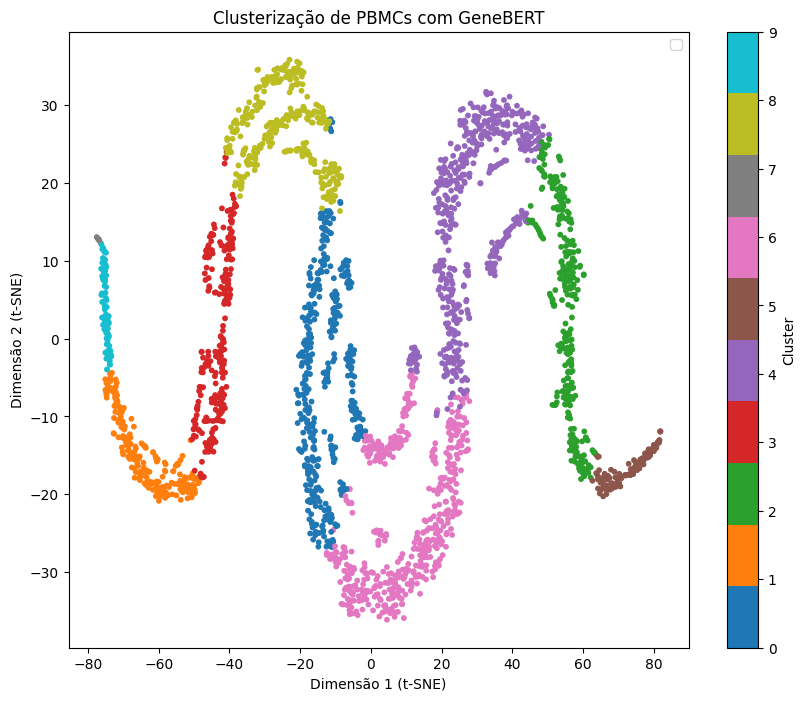

In [ ]:
# prompt: como mostrar na legenda os tipos de celulas usando informações da GeneBert

# ... (código anterior)

# 6. Visualizar os Clusters com t-SNE e tipos de células (se disponíveis)
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(cell_embeddings)

plt.figure(figsize=(10, 8))

# Verificar se a coluna 'cell_type' existe nos metadados
if 'cell_type' in adata.obs.columns:
    # Se existir, plotar com cores baseadas nos tipos de células
    for cell_type in adata.obs['cell_type'].unique():
        indices = adata.obs['cell_type'] == cell_type
        plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1],
                    label=cell_type, s=10, alpha=0.7)  # Adiciona transparência para melhor visualização
else:
    # Se não existir, plotar com cores baseadas nos clusters
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap="tab10", s=10)
    plt.colorbar(label="Cluster")


plt.title("Clusterização de PBMCs com GeneBERT")
plt.xlabel("Dimensão 1 (t-SNE)")
plt.ylabel("Dimensão 2 (t-SNE)")
plt.legend() # Mostra a legenda com os tipos de células
plt.show()

In [ ]:
gene_embeddings

array([[-0.15638219,  0.1476089 , -0.18201086, ..., -0.25221163,
         0.5731146 ,  0.22850409],
       [-0.13842049, -0.07334416, -0.02814829, ..., -0.26706368,
         0.41163152,  0.10596863],
       [-0.18997264,  0.14302175, -0.08803687, ..., -0.21655223,
         0.58359116,  0.06789653],
       ...,
       [-0.1675577 , -0.08568487,  0.04667551, ..., -0.0985057 ,
         0.02621203,  0.22912951],
       [-0.26815626, -0.03806357,  0.12024019, ..., -0.14670533,
         0.14610825,  0.17794812],
       [-0.22624536, -0.07968128,  0.19288665, ..., -0.19205002,
         0.20264308,  0.15429108]], dtype=float32)

In [ ]:
adata

AnnData object with n_obs × n_vars = 2700 × 2000
    obs: 'clusters'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
clusters

In [ ]:
pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.4 MB/s eta 0:00:00


In [ ]:
import igraph

In [ ]:
adata.obs['clusters'] = adata.obs['clusters'].astype('category')

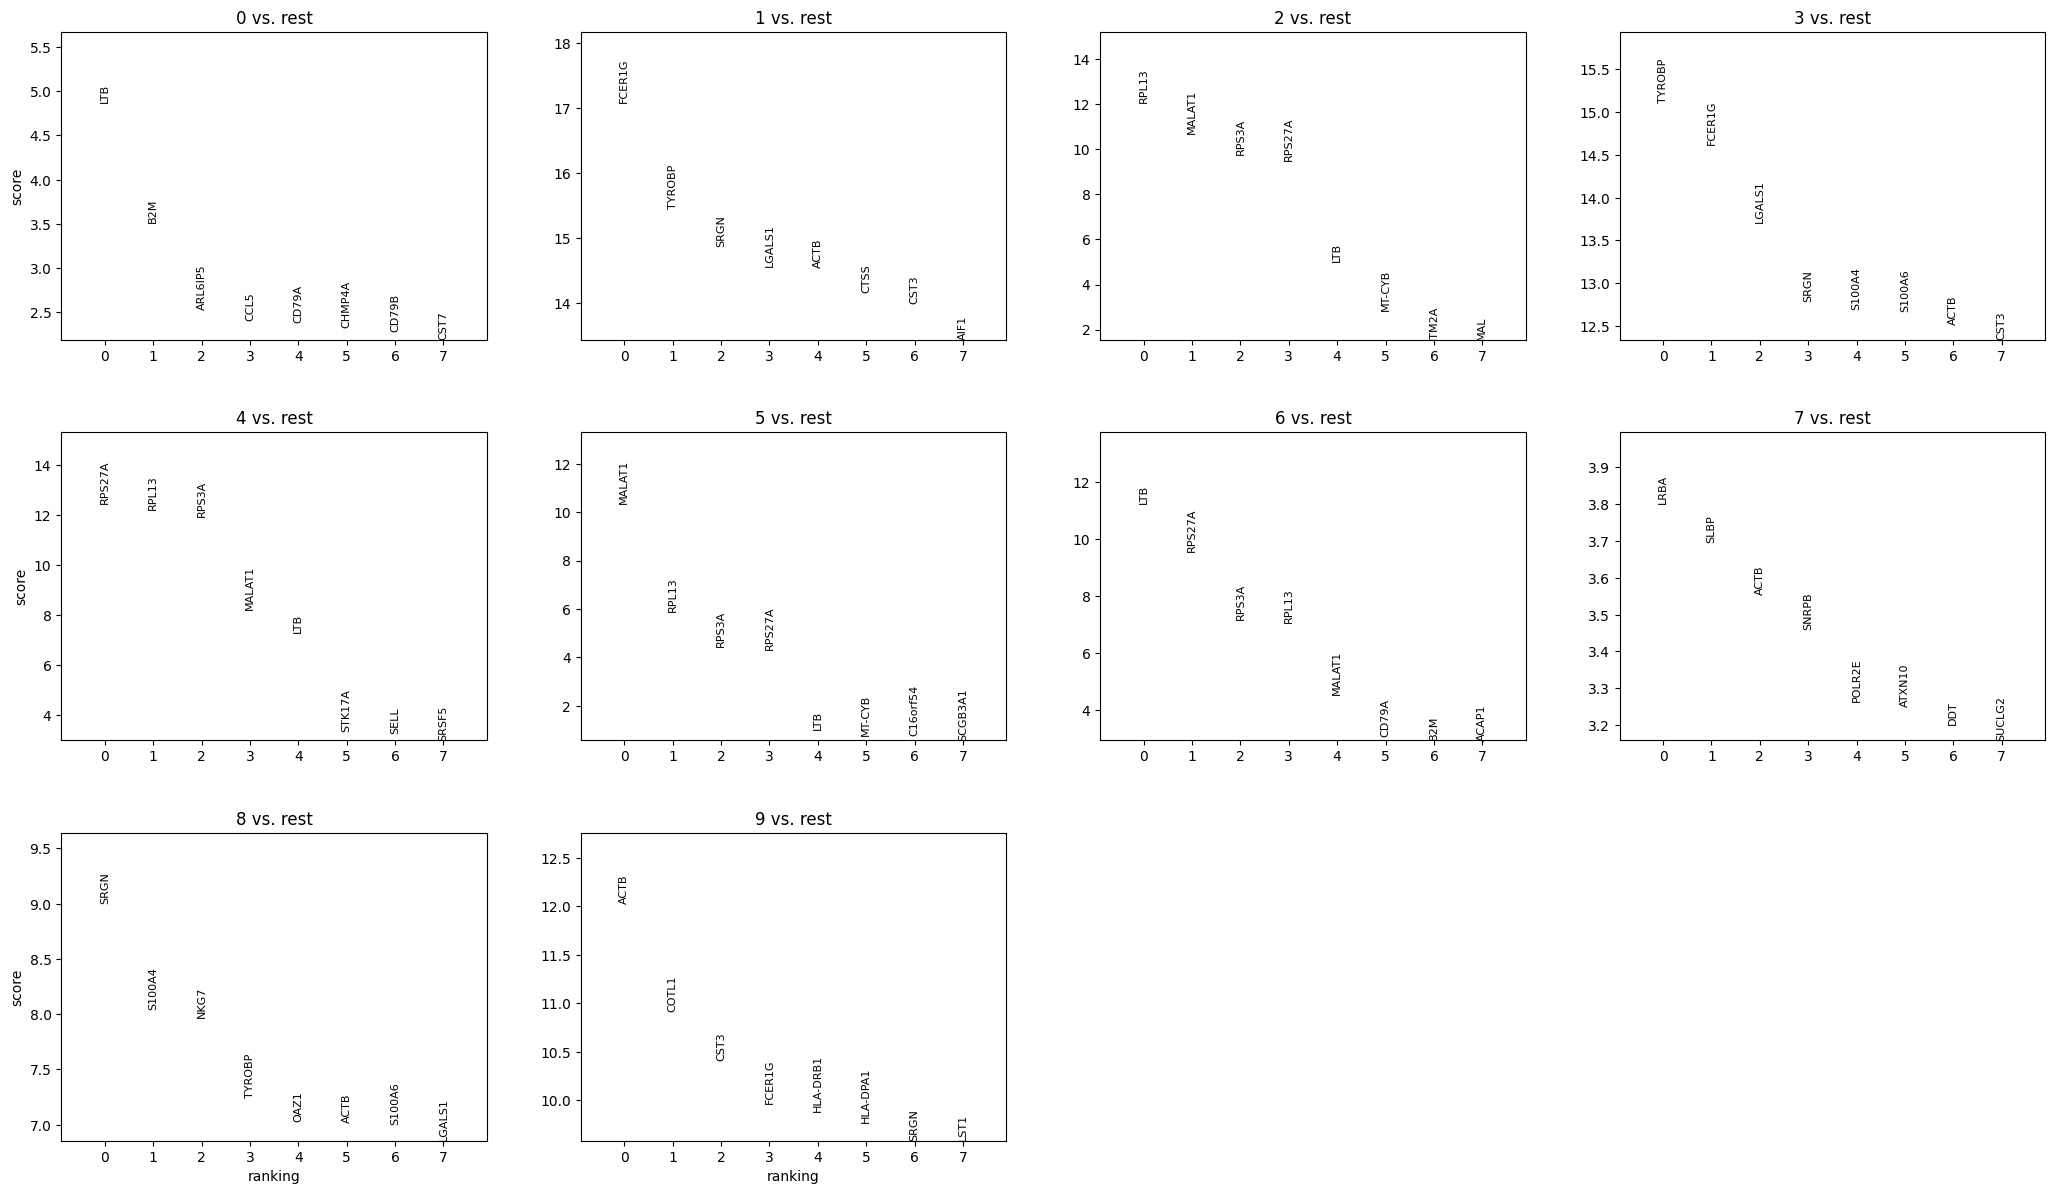

In [ ]:
sc.tl.rank_genes_groups(adata, 'clusters', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=8, sharey=False)

In [ ]:
# prompt: como imprimir a lista de  genes por clusters

import pandas as pd

# Supondo que 'adata' e 'clusters' estejam definidos como no seu código anterior

# Criar um DataFrame pandas com os resultados
result_df = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

# Imprimir a lista de genes por cluster
for cluster in result_df.columns:
    print(f"Cluster {cluster}:")
    print(result_df[cluster].tolist())
    print("-" * 20)

Cluster 0:
['LTB', 'B2M', 'ARL6IP5', 'CCL5', 'CD79A', 'CHMP4A', 'CD79B', 'CST7', 'CDC37', 'KARS', 'JTB', 'TTC1', 'GZMK', 'LSM14A', 'VPS28', 'TIGIT', 'NOP58', 'PPP1R2', 'TMED4', 'GZMA']
--------------------
Cluster 1:
['FCER1G', 'TYROBP', 'SRGN', 'LGALS1', 'ACTB', 'CTSS', 'CST3', 'AIF1', 'LST1', 'COTL1', 'FTH1', 'SAT1', 'OAZ1', 'LYZ', 'NPC2', 'S100A4', 'PYCARD', 'FTL', 'HLA-DRB1', 'HLA-DPA1']
--------------------
Cluster 2:
['RPL13', 'MALAT1', 'RPS3A', 'RPS27A', 'LTB', 'MT-CYB', 'ITM2A', 'MAL', 'LDLRAP1', 'TRABD2A', 'ACAP1', 'SRSF5', 'SELL', 'MAGEH1', 'SCGB3A1', 'AQP3', 'MDS2', 'ZNF626', 'STK17A', 'NOG']
--------------------
Cluster 3:
['TYROBP', 'FCER1G', 'LGALS1', 'SRGN', 'S100A4', 'S100A6', 'ACTB', 'CST3', 'CTSS', 'LYZ', 'OAZ1', 'SAT1', 'FTL', 'S100A9', 'FTH1', 'FCN1', 'AIF1', 'LST1', 'PYCARD', 'LGALS2']
--------------------
Cluster 4:
['RPS27A', 'RPL13', 'RPS3A', 'MALAT1', 'LTB', 'STK17A', 'SELL', 'SRSF5', 'MAL', 'AQP3', 'MT-CYB', 'RIC3', 'GIMAP5', 'TRABD2A', 'ACAP1', 'EIF3D', 'TCL1

In [ ]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.6 MB/s eta 0:00:00


In [ ]:
import celltypist
from celltypist import models  # Import the models submodule

In [ ]:
# Exportar matriz de expressão
pbmc3k_matrix = adata.to_df()


In [ ]:
# Classificar as células
model = models.download_models('Immune_All_Low.pkl')


In [ ]:
model = models.download_models(force_update = True)


In [ ]:
models.models_description()

,model,description
0,Immune_All_Low.pkl,immune sub-populations combined from 20 tissue...
1,Immune_All_High.pkl,immune populations combined from 20 tissues of...
2,Adult_COVID19_PBMC.pkl,peripheral blood mononuclear cell types from C...
3,Adult_CynomolgusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult cynom...
4,Adult_Human_MTG.pkl,cell types and subtypes (10x-based) from the a...
5,Adult_Human_PancreaticIslet.pkl,cell types from pancreatic islets of healthy a...
6,Adult_Human_PrefrontalCortex.pkl,cell types and subtypes from the adult human d...
7,Adult_Human_Skin.pkl,cell types from human healthy adult skin
8,Adult_Human_Vascular.pkl,vascular populations combined from multiple ad...
9,Adult_Mouse_Gut.pkl,cell types in the adult mouse gut combined fro...


In [ ]:
model = models.Model.load(model = 'Immune_All_Low.pkl')

In [ ]:
model = models.Model.load()

In [ ]:
model

CellTypist model with 98 cell types and 6639 features
    date: 2022-07-16 00:20:42.927778
    details: immune sub-populations combined from 20 tissues of 18 studies
    source: https://doi.org/10.1126/science.abl5197
    version: v2
    cell types: Age-associated B cells, Alveolar macrophages, ..., pDC precursor
    features: A1BG, A2M, ..., ZYX

None


In [ ]:
#arquivo = '/content/drive/MyDrive/pbmc3k_matrix.csv'
#prediction = celltypist.annotate(filename=arquivo, model=model)
prediction = celltypist.annotate(model=model)
print(prediction.predicted_labels)

IndexError: list index out of range

In [ ]:
from transformers  import AutoTokenizer

In [ ]:
pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.4 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez

Entrez.email = "helainytorres@gmail.com"

# Pesquisar GeneID para um gene específico
def get_geneid(gene_name, species="Homo sapiens"):
    handle = Entrez.esearch(db="gene", term=f"{gene_name}[Gene] AND {species}[Organism]")
    record = Entrez.read(handle)
    handle.close()
    return record["IdList"]

# Exemplo: Obter GeneID para TP53 em humanos
gene_name = "TP53"
geneid = get_geneid(gene_name)
print(f"O GeneID para {gene_name} é: {geneid}")

O GeneID para TP53 é: ['7157']


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext")
tokens = tokenizer("AGCTTGCA", return_tensors="pt")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

In [ ]:
print(tokens)

{'input_ids': tensor([[    2, 21879,  3519, 29315,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}


In [ ]:
tokenizer

BertTokenizer(name_or_path='microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]